In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# import data
df_star = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/Star3642_balanced.csv")
df_star.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [ ]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


biasanya optimal k ada di sekitar `sqrt(n)/2` dimana n adalah jumlah data

In [ ]:
# kita gunakan kolom Vmag, B-V, dan Amag untuk memprediksi TargetClass

features = df_star[['Vmag', 'B-V', 'Amag']]
target = df_star['TargetClass']

# harusnya kita data cleaning, missing value, split data, encoding, normalizing, dll..

In [ ]:
error_rate = []
jumlah_k = range(1, 200, 4)
for i in jumlah_k:
  # print(i)
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(features, target)

  pred_i = model.predict(features)
  error_rate.append(np.mean(pred_i != target))

print(error_rate)

[0.0, 0.09390444810543658, 0.10049423393739704, 0.10296540362438221, 0.10241625480505218, 0.10461285008237232, 0.10598572213069742, 0.10680944535969247, 0.10680944535969247, 0.10735859417902252, 0.10818231740801758, 0.10873146622734761, 0.10900604063701264, 0.10982976386600769, 0.11037891268533773, 0.11175178473366282, 0.11202635914332784, 0.11312465678198792, 0.11312465678198792, 0.11257550796265788, 0.11312465678198792, 0.11422295442064799, 0.11532125205930807, 0.11641954969796815, 0.11724327292696321, 0.11751784733662822, 0.12081274025260846, 0.12300933552992861, 0.12355848434925865, 0.12465678198791873, 0.12657880285557385, 0.12822624931356397, 0.12822624931356397, 0.12987369577155408, 0.12959912136188906, 0.1315211422295442, 0.1315211422295442, 0.13289401427786932, 0.13344316309719934, 0.1356397583745195, 0.1370126304228446, 0.13673805601317957, 0.13618890719384955, 0.1370126304228446, 0.13811092806150466, 0.13948380010982978, 0.1386600768808347, 0.13948380010982978, 0.13975837451

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(features, target)

pred_i = model.predict(features)
error_rate.append(np.mean(pred_i != target))

In [ ]:
pd.DataFrame({"hasil prediksi":pred_i, "data awal":target, "prediksi salah":pred_i != target})

,hasil prediksi,data awal,prediksi salah
0,0,0,False
1,0,0,False
2,0,0,False
3,1,1,False
4,1,1,False
...,...,...,...
3637,0,0,False
3638,1,1,False
3639,0,0,False
3640,1,1,False


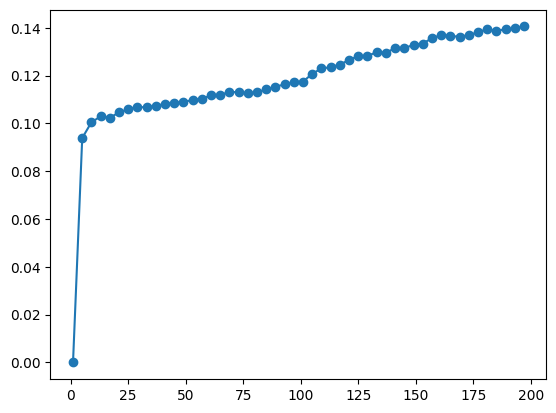

In [ ]:
plt.plot(jumlah_k, error_rate, marker="o")

saat k = 1, error rate adalah 0

ini artinya model kita berhasil memprediksi sama persis dengan data awal kita. kemungkinan model kita overfit karena dia hanya menghapal data latihan.

untuk menghindari keanehan (kesalahan) seperti ini, kita harus split data awal kita menjadi 2 set: training dan testing. harusnya tidak terjadi seperti ini lagi.

In [ ]:
# coba lagi dengan split data jadi training dan testing
# kita gunakan kolom Vmag, B-V, dan Amag untuk memprediksi TargetClass
features = df_star[['Vmag', 'B-V', 'Amag']]
target = df_star['TargetClass']

# harusnya kita data cleaning, missing value, split data, encoding, normalizing, dll..
# kita lakukan splitting saja
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [ ]:
len(X_test)

911

In [ ]:
y_test.value_counts()

0    463
1    448
Name: TargetClass, dtype: int64

In [ ]:
error_rate = []
jumlah_k = range(1, 100, 1)
for i in jumlah_k:
  # training dari data training
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)

  # test dari data test
  pred_i = model.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

print(error_rate)

[0.16355653128430298, 0.14489571899012074, 0.1207464324917673, 0.11964873765093303, 0.11306256860592755, 0.1119648737650933, 0.11306256860592755, 0.1163556531284303, 0.10976948408342481, 0.1119648737650933, 0.10867178924259056, 0.10976948408342481, 0.10976948408342481, 0.10976948408342481, 0.10647639956092206, 0.10757409440175632, 0.10647639956092206, 0.10647639956092206, 0.10537870472008781, 0.10647639956092206, 0.10537870472008781, 0.10647639956092206, 0.10647639956092206, 0.10757409440175632, 0.10757409440175632, 0.10976948408342481, 0.10867178924259056, 0.11086717892425905, 0.11086717892425905, 0.10867178924259056, 0.10976948408342481, 0.1119648737650933, 0.11306256860592755, 0.1141602634467618, 0.11525795828759605, 0.1163556531284303, 0.1163556531284303, 0.1141602634467618, 0.1141602634467618, 0.1141602634467618, 0.11745334796926454, 0.11525795828759605, 0.11745334796926454, 0.11525795828759605, 0.1163556531284303, 0.1163556531284303, 0.1163556531284303, 0.1163556531284303, 0.1152

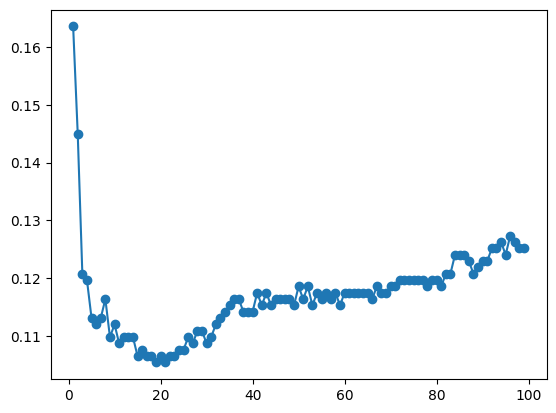

In [ ]:
plt.plot(jumlah_k, error_rate, marker="o")

sepertinya setelah kita menggunakan k di sekitar 20an, menambah jumlah k hanya membuat modelnya semakin condong ke arah yang salah.

mungkin karena data awal kita tidak imbang jumlah class nya (yg di class 0 berapa, yg di class 1 berapa, jumlah tidak sama) jadi setelah melewati jumlah k tertentu (dan semakin besar k nya) modelnya jadi selalu menebak 1 class saja (yg jumlahnya lebih banyak di dataset kita). dengan begitu, model semakin lama semakin tidak akurat.

In [ ]:
P = 52/(52+12)
P

0.8125

precision
- TP: prediksi 1, beneran 1, ada 52
- FP: prediksi 1, bukan 1, ada 12

precision = TP / (TP + FP)

In [ ]:
2+5+1+2+1+9+2+0+12 # semua yang salah prediksi

R = 52 / (52 + 8)
R

0.8666666666666667

recall
- TP: prediksi 1, beneran 1, ada 52
- FN: prediksi bukan 1, padahal 1, ada 8

recall = TP / (TP + FN)

In [ ]:
F1Score = 2*P*R / (P+R)
F1Score

0.8387096774193549

F1 - Score

weighted average antara precision dan recall

F1Score = 2 * P * R / (P + R)

Cara memilih Model terbaik

1. kita bisa lihat accuracy untuk overall akurasi model nya. Kalau kita mau model yang paling akurat, kita gunakan angka ini.

2. Terkadang, kita mau model bisa prediksi kelas tertentu dengan baik. Contoh, untuk model prediksi diabetes/ tidak. Kita mau modelnya lebih condong prediksi orang diabetes. Kita mau recall untuk orang yang diabetes mendekato 100%.

Di situasi seperti ini, kita fokus ke recall kelas positive diabetes.

Kenapa kita mau model seperti ini? mungkin kita mau orang yang tidak punya penyakit diabetes juga check up kalau sudah mendekati angka2 hasil tes darah mirip orang yang mau diabetes. mungkin kita mau semua orang yang menderita diabetes di prediksi positive, jadi mereka bisa lsg checkup.

Jadi di saat tertentu, kita fokus bukan ke akurasi, tapi ke precision atau recall kategori tertentu.

3. Kadang bisa juga kita terlimitasi dengan jumlah data, waktu, dan computing power tools yang kita miliki. Kita tidak bisa menggunakan model dengan akurasi terbaik karena kita juga memikirkan waktu yang diperlukan untuk melatih model tersebut

dll... sesuaikan dengan tujuan model

In [ ]:
df_star.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [ ]:
# kita hapus beberapa data
df_star

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


kita siapkan (contoh) 5 data missing, menggunakan np.nan

In [ ]:
[np.nan] * 5

[nan, nan, nan, nan, nan]

kita gunakan .loc di sebelah kiri

`data_kita.loc[[index index yg mau diubah], [kolom kolom yg mau diubah]] = data_baru`

jumlah data sebelah kiri dan sebelah kanan harus sama

In [ ]:
# disini, jumlah data sama sama 5
df_star.loc[[0,1,2,3,4], "B-V"] = [np.nan] * 5

kita bisa lihat hasilnya, berhasil mengubah 5 data di kolom B-V menjadi missing, nan

In [ ]:
df_star

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,NaN,K5III,16.678352,0
1,8.70,2.31,1.29,NaN,B1II,15.518060,0
2,5.77,5.50,1.03,NaN,G5III,14.471813,0
3,6.72,5.26,0.74,NaN,B7V,15.324928,1
4,8.76,13.44,1.16,NaN,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


perhatikan kita bisa ambil seluruh kolom B-V menggunakan .loc

indexnya pakai ":" untuk bilang semuanya. semua index.

In [ ]:
df_star.loc[:, "B-V"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
3637    1.786
3638    0.408
3639    1.664
3640    0.210
3641    1.176
Name: B-V, Length: 3642, dtype: float64

di sebelah kanan, kita pilih satu kolom, dan gunakan .fillna() untuk mengisi semua nan menjadi 1 value tertentu

In [ ]:
df_star["B-V"].fillna(0)

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
3637    1.786
3638    0.408
3639    1.664
3640    0.210
3641    1.176
Name: B-V, Length: 3642, dtype: float64

seperti ini, jumlah data di kiri dan kanan sama. ada 3642 data.

In [ ]:
df_star.loc[:, "B-V"] = df_star["B-V"].fillna(0)

perhatikan kita sudah berhasil replace, data awal kita `df_star.loc[:, "B-V"]` menjadi `df_star["B-V"].fillna(0)`

In [ ]:
df_star

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,0.000,K5III,16.678352,0
1,8.70,2.31,1.29,0.000,B1II,15.518060,0
2,5.77,5.50,1.03,0.000,G5III,14.471813,0
3,6.72,5.26,0.74,0.000,B7V,15.324928,1
4,8.76,13.44,1.16,0.000,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


kalau tidak pakai .loc, harusnya tetap bisa replace data, cuma kita akan dapat warning.

warning bertujuan memberi kita peringatan kalau kita sudah (sepertinya tidak sengaja) mengubah data awal kita